<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W5(Exercise)_04_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=92629d60042ff22e1bb00c3392223e5acca022d15927203ab775c0235e4d8b49
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


0.6207226886600542


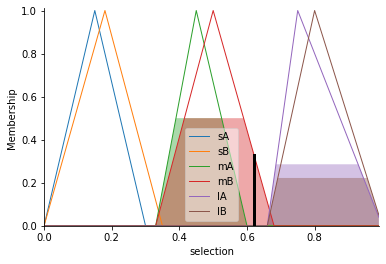

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Clothing selection
# 4 input: "Height" "Weight" "Chest" "waist"
height = ctrl.Antecedent(np.arange(90,160,1), 'height')
waist = ctrl.Antecedent(np.arange(43,70,1), 'waist')
#weight just arrive in brand A 
#**weight = ctrl.Antecedent(np.arange(0,6,0.1), 'weight')
#chest just arrive in brand B
#**chest = ctrl.Antecedent(np.arange(0,6,0.1), 'chest')
#and weight equal 1/3 chest, so i combine 2 input into 1 input is weight
weight = ctrl.Antecedent(np.arange(15,48,1), 'weight')
# 1 output: "selection"
selection = ctrl.Consequent(np.arange(0,1,0.01), 'selection')

# 4 levels:  "mild" "moderate" "service" "very service"
height['short'] = fuzz.trimf(height.universe, [93,112,123])
height['normal'] = fuzz.trimf(height.universe, [93,123,138])
height['high'] = fuzz.trimf(height.universe, [98,135,146])
height['very_high'] = fuzz.trimf(height.universe, [98,152,158])

weight['very_light'] = fuzz.trimf(weight.universe, [17,20,22])
weight['light'] = fuzz.trimf(weight.universe, [17,23,25])
weight['moderate'] = fuzz.trimf(weight.universe, [23,29,33])
weight['heavy'] = fuzz.trimf(weight.universe, [30,38,45])

waist['thin'] = fuzz.trimf(waist.universe, [45,53,57])
waist['normal'] = fuzz.trimf(waist.universe, [45,55,59])
waist['over_weight'] = fuzz.trimf(waist.universe, [46,60,64])
waist['obesity'] = fuzz.trimf(waist.universe, [46,64,67])

selection['sA'] = fuzz.trimf(selection.universe, [0,0.15,0.3])
selection['sB'] = fuzz.trimf(selection.universe, [0,0.18,0.35])
selection['mA'] = fuzz.trimf(selection.universe, [0.33,0.45,0.6])
selection['mB'] = fuzz.trimf(selection.universe, [0.33,0.5,0.68])
selection['lA'] = fuzz.trimf(selection.universe, [0.66,0.75,1])
selection['lB'] = fuzz.trimf(selection.universe, [0.66,0.8,1])


#      &
#create rules
rule1 = ctrl.Rule((height['short'] & weight['very_light'] & waist['thin']) 
                  | (height['short'] & weight['light'] & waist['thin'])
                  | (height['short'] & weight['very_light'] & waist['normal'])
                  | (height['normal'] & weight['very_light'] & waist['thin']),
                  selection['sA'])


rule2 = ctrl.Rule((height['short'] & weight['light'] & waist['normal'])
                  | (height['normal'] & weight['light'] & waist['thin'])
                  | (height['normal'] & weight['very_light'] & waist['normal']),
                  selection['sB'])


rule3 = ctrl.Rule((height['normal'] & weight['light'] & waist['normal'])
                  | (height['normal'] & weight['moderate'] & waist['normal'])
                  | (height['normal'] & weight['light'] & waist['over_weight'])
                  | (height['high'] & weight['light'] & waist['normal']),
                  selection['mA'])


rule4 = ctrl.Rule((height['normal'] & weight['moderate'] & waist['over_weight'])
                  | (height['high'] & weight['light'] & waist['over_weight'])
                  | (height['high'] & weight['moderate'] & waist['normal']),
                  selection['mB'])


rule5 = ctrl.Rule((height['high'] & weight['moderate'] & waist['over_weight'])
                  | (height['very_high'] & weight['moderate'] & waist['over_weight'])
                  | (height['high'] & weight['heavy'] & waist['over_weight'])
                  | (height['high'] & weight['moderate'] & waist['obesity']), 
                  selection['lA'])


rule6 = ctrl.Rule((height['very_high'] & weight['heavy'] & waist['obesity'])
                  | (height['high'] & weight['heavy'] & waist['obesity'])
                  | (height['very_high'] & weight['moderate'] & waist['obesity'])
                  | (height['very_high'] & weight['heavy'] & waist['over_weight']),
                  selection['lB'])

selection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
selectioning = ctrl.ControlSystemSimulation(selection_ctrl)

selectioning.input['height'] = 120
selectioning.input['weight'] = 30
selectioning.input['waist'] = 50

selectioning.compute()

print(selectioning.output['selection'])

selection.view(sim=selectioning)